<a href="https://colab.research.google.com/github/yashver025/ML_Model_Basics/blob/main/Digit_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Classification using CNN**

In [16]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
(X_train, Y_train),(X_test, Y_test) = keras.datasets.mnist.load_data()

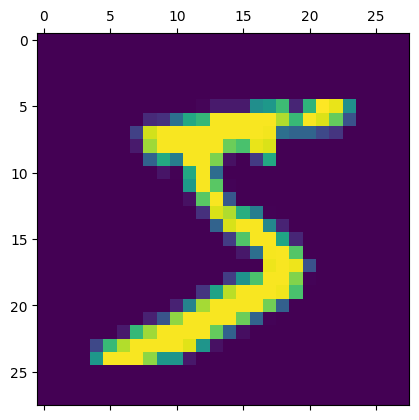

In [19]:
plt.matshow(X_train[0])

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train_reshape = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test_reshape = X_test.reshape(-1,28,28,1).astype('float32')/255.0

# As CNN takes 4D input (batch_size, height, width, channels) so we need to reshape
# astype('float32') converts pixel integer values (0-255) into float values as CNN performs better in float
# /255 to scale the pixel value (0-255) into (0-1)
# -1 tells NumPy to automatically figure out the number

In [22]:
X_train_reshape.shape

(60000, 28, 28, 1)

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'), # No. of Filters = 32, Size of filter = (3*3)
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(X_train_reshape, Y_train, epochs=5, batch_size=100)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8487 - loss: 0.5024
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.9785 - loss: 0.0698
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.9856 - loss: 0.0471
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.9897 - loss: 0.0349
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - accuracy: 0.9914 - loss: 0.0286


In [27]:
Y_pred = model.predict(X_test_reshape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [29]:
model.evaluate(X_test_reshape, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9845 - loss: 0.0468


[0.035443902015686035, 0.9886000156402588]

In [30]:
Y_test[0]

np.uint8(7)

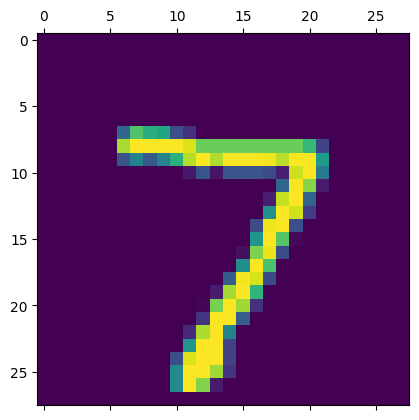

In [34]:
plt.matshow(X_test[0])

In [31]:
Y_pred[0]

array([9.7711146e-09, 3.5680902e-08, 7.3915635e-06, 1.0651792e-05,
       3.4737777e-10, 1.0601787e-09, 2.9742025e-12, 9.9998182e-01,
       3.0668353e-08, 4.3345931e-08], dtype=float32)

In [32]:
np.argmax(Y_pred[0]) # Gives the INDEX (0-9) of the maximun value in the array

np.int64(7)